In [416]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [417]:
df = pd.read_csv('Churn History Dataset.csv')

In [418]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3332 non-null float64
total day charge                 3332 non-null float64
total eve minutes                3331 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3332 non-null float64
total night minutes              3333 non-null float64
total night calls                3331 non-null float64
total night charge               3333 non-null float64
total intl minutes       

In [420]:
#checking why phone number is float
df['phone number'] = df['phone number'].apply(lambda x: int(x.replace('-','')))
df['phone number']   


0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
5       3918027
6       3559993
7       3299001
8       3354719
9       3308173
10      3296603
11      3449403
12      3631107
13      3948006
14      3669238
15      3517269
16      3508884
17      3862923
18      3562992
19      3732782
20      3965800
21      3937984
22      3581958
23      3502565
24      3434696
25      3313698
26      3573817
27      4186412
28      3532630
29      4107789
         ...   
3303    3737308
3304    3307137
3305    4068445
3306    4045283
3307    3983632
3308    3995763
3309    3409449
3310    3631123
3311    3612170
3312    4066304
3313    3925090
3314    3737713
3315    3921376
3316    3906388
3317    3797290
3318    3979928
3319    3786924
3320    4115677
3321    4002738
3322    4091856
3323    3625899
3324    3771164
3325    3688555
3326    3476812
3327    3483830
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Leng

In [421]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3332
Data columns (total 21 columns):
state                            3330 non-null object
account length                   3330 non-null int64
area code                        3330 non-null int64
phone number                     3330 non-null int64
international plan               3330 non-null object
voice mail plan                  3330 non-null object
number vmail messages            3330 non-null int64
total day minutes                3330 non-null float64
total day calls                  3330 non-null float64
total day charge                 3330 non-null float64
total eve minutes                3330 non-null float64
total eve calls                  3330 non-null int64
total eve charge                 3330 non-null float64
total night minutes              3330 non-null float64
total night calls                3330 non-null float64
total night charge               3330 non-null float64
total intl minutes        

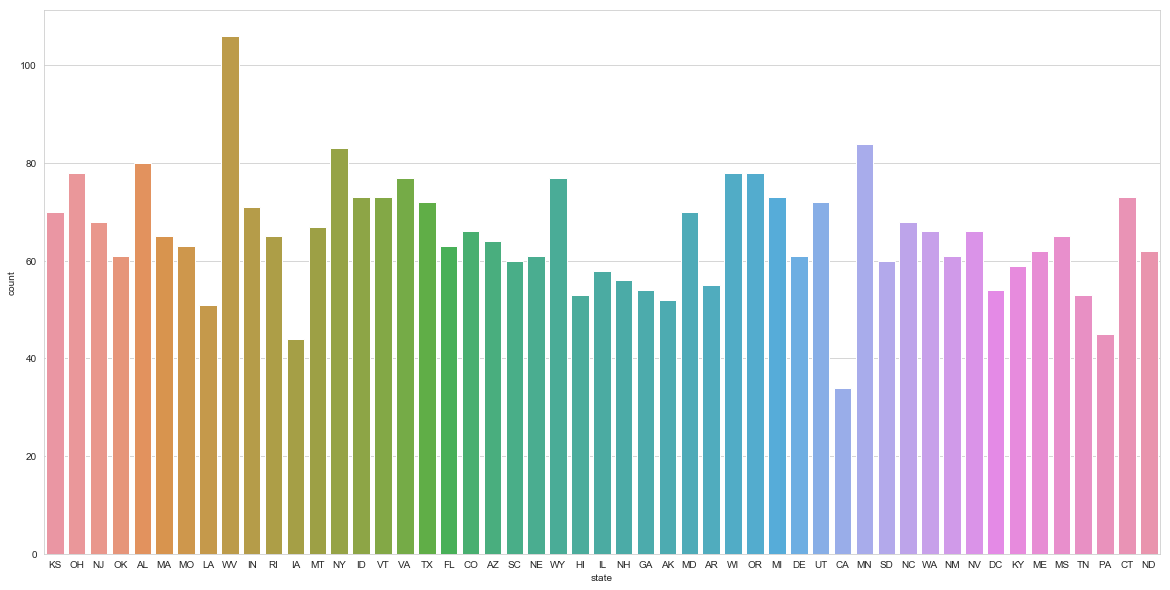

In [422]:
sns.countplot(df['state'])

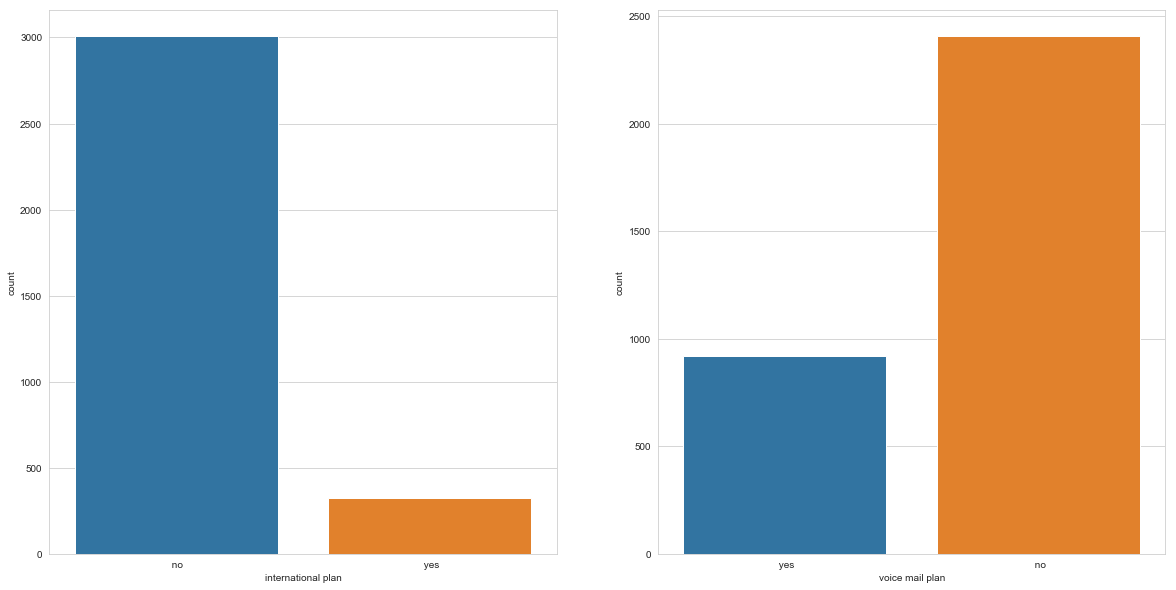

In [423]:
plt.subplot(1,2,1)
sns.countplot(df['international plan'])
plt.subplot(1,2,2)
sns.countplot(df['voice mail plan'])

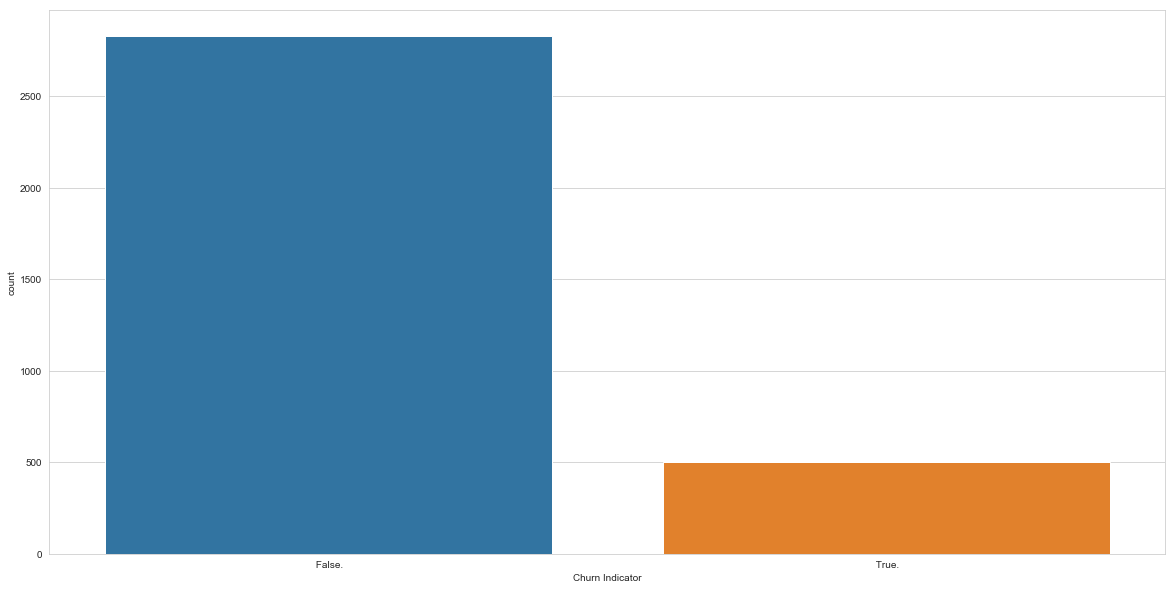

In [424]:
sns.countplot(df['Churn Indicator'])

In [425]:
len(df[df['Churn Indicator'] == ' False.'])

2827

In [426]:
#checking data balance
l = len(df[df['Churn Indicator'] == ' True.'])
r = len(df[df['Churn Indicator'] == ' False.'])
print('% of trues in data is {}'.format(round((l/len(df))*100,2)))
print('% of falses in data is {}'.format(round((r/len(df))*100,2)))

% of trues in data is 15.11
% of falses in data is 84.89


In [427]:
#plt.figure(figsize = (25,25))
#sns.pairplot(df)

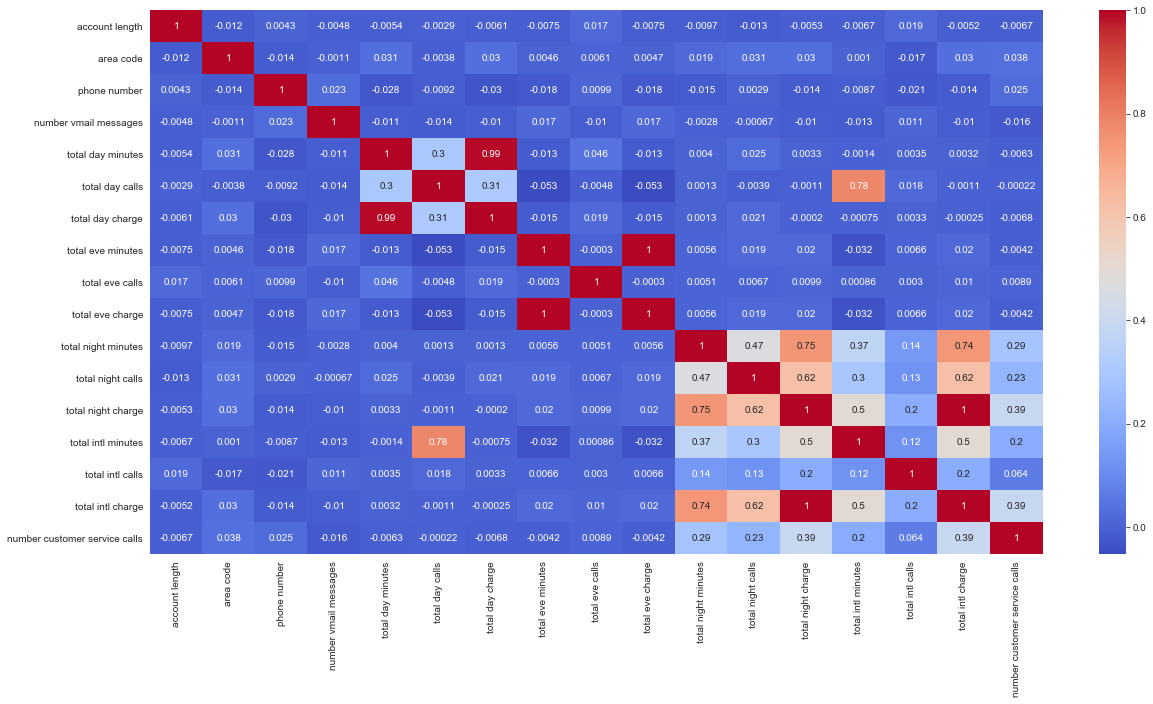

In [428]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

In [429]:
#dropping some feature due to correlation
df.drop(['phone number','total day charge','total eve charge','total intl charge',
         'total intl minutes','total night calls','total night charge'],axis = 1,inplace =True)
new_df = df
columns_for_test = new_df.columns

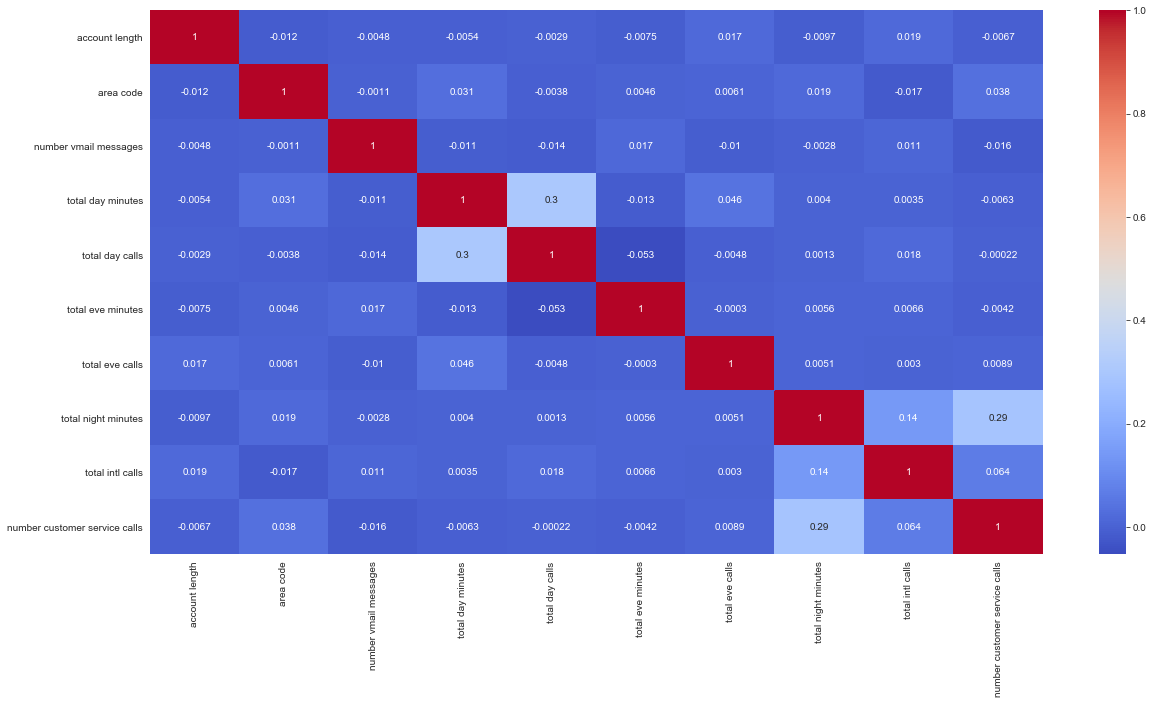

In [430]:
sns.heatmap(new_df.corr(),annot = True, cmap = 'coolwarm')

In [431]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3332
Data columns (total 14 columns):
state                            3330 non-null object
account length                   3330 non-null int64
area code                        3330 non-null int64
international plan               3330 non-null object
voice mail plan                  3330 non-null object
number vmail messages            3330 non-null int64
total day minutes                3330 non-null float64
total day calls                  3330 non-null float64
total eve minutes                3330 non-null float64
total eve calls                  3330 non-null int64
total night minutes              3330 non-null float64
total intl calls                 3330 non-null int64
number customer service calls    3330 non-null int64
Churn Indicator                  3330 non-null object
dtypes: float64(4), int64(6), object(4)
memory usage: 466.2+ KB


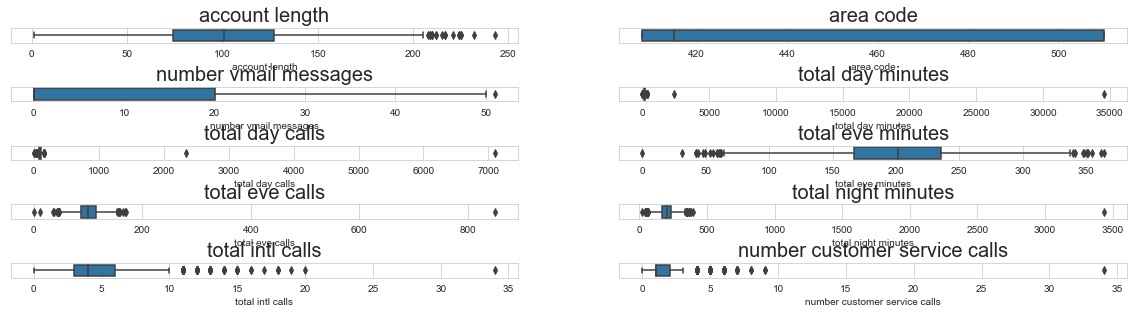

In [432]:
#seeing outliers
i = 0
outlier_col_list = []
plt.subplots_adjust(hspace = 3.0)
for item in new_df.columns:
    if new_df[item].dtypes != 'object':
        outlier_col_list.append(item)
        plt.subplot(10,2,i+1)
        sns.boxplot(df[item])
        plt.title(item,fontsize = 20)
        i+=1

In [433]:
#outliers:
#account length
#number vmail messages(only 1 outlier )
#total day minutes
#total day calls (only 2 outlier)
#total eve minutes
#

In [434]:

#finding outliers:
#interquartile method
def outlier_detect(df_col):
    q75, q25 = np.percentile(df_col, [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    return min_val, max_val

def remove_outliers(df_col,a,b):
    if df_col<a and df_col>b:
        return np.nan
    else:
        return df_col

#start removing outliers
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

def outlier_treatment(new_df,target_col,pred_col='Churn Indicator'):
    
    l = len(new_df[new_df[pred_col] == ' True.'][target_col])
    r = len(new_df[new_df[pred_col] == ' False.'][target_col])

    print('before removing outliers % of trues in data is {}'.format(round((l/len(df))*100,2)))
    print('before removing outliers % of falses in data is {}'.format(round((r/len(df))*100,2)))

    a,b = outlier_detect(df[target_col])

    df[target_col] = df[(df[target_col] >= a) & (df[target_col] <= b) ][target_col]

    l = len(new_df[new_df[pred_col] == ' True.'][target_col].dropna())
    r = len(new_df[new_df[pred_col] == ' False.'][target_col].dropna())
    print('-------------------------------------------------------------------------------')
    print('after removing outliers % of trues in data is {}'.format(round((l/(l+r))*100,2)))
    print('after removing outliers % of falses in data is {}'.format(round((r/(l+r))*100,2)))

    plt.subplot(1,2,1)
    original_data_column = new_df[target_col]
    plt.boxplot(new_df[target_col])
    plt.title("original_data_column")

    plt.subplot(1,2,2)
    plt.boxplot(new_df[target_col].dropna())                           
    plt.title("removed_outliers")

    plt.show()

<Figure size 1296x432 with 0 Axes>

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.04
after removing outliers % of falses in data is 84.96


C:\Users\yasht\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\yasht\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\yasht\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\yasht\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\yasht\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


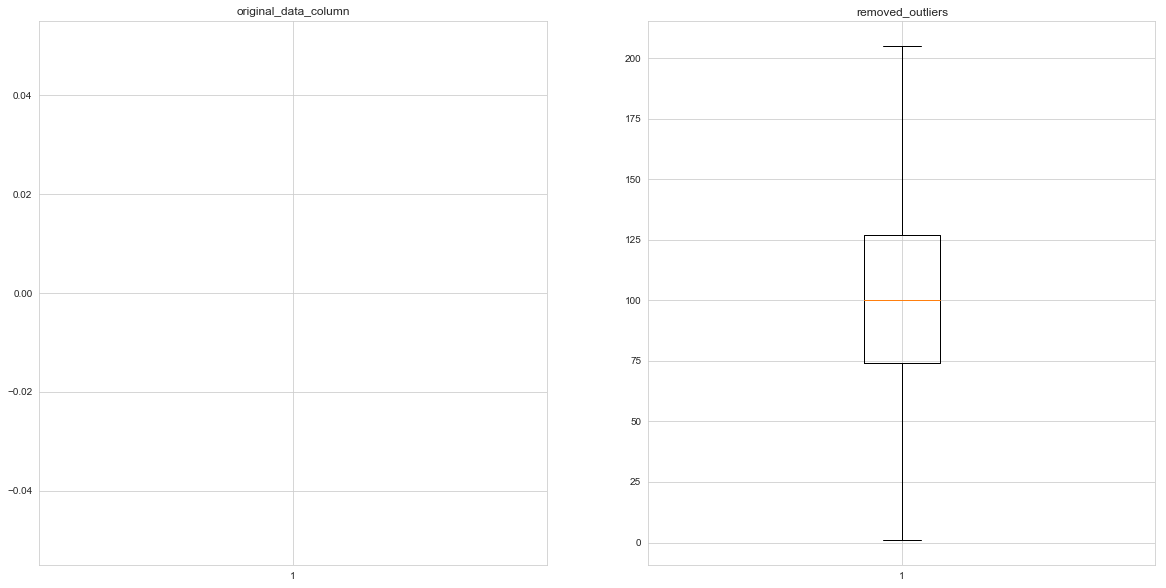

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.11
after removing outliers % of falses in data is 84.89


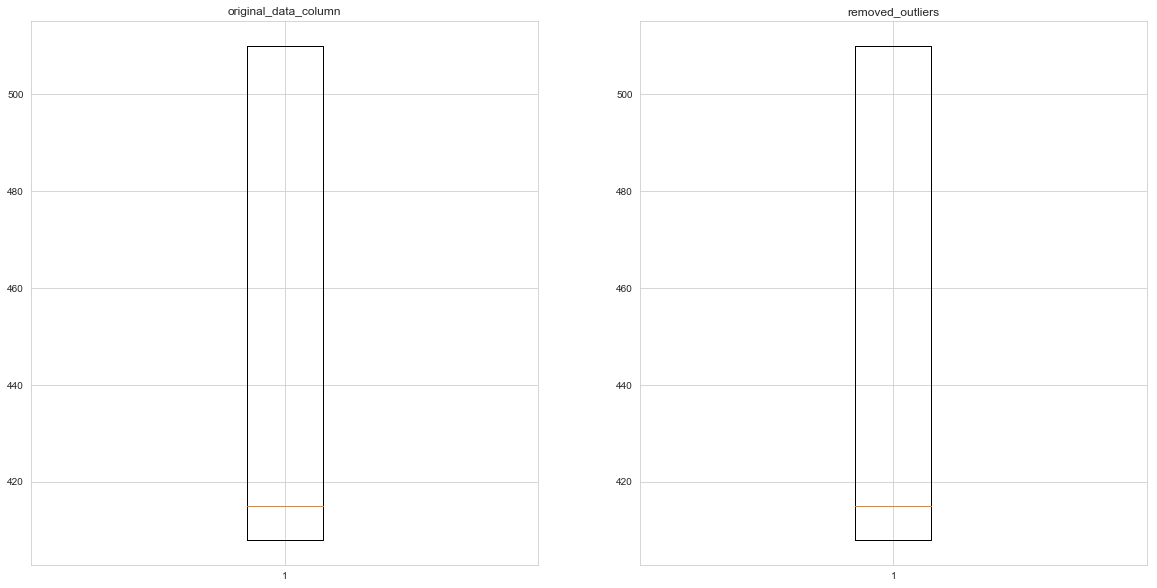

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.11
after removing outliers % of falses in data is 84.89


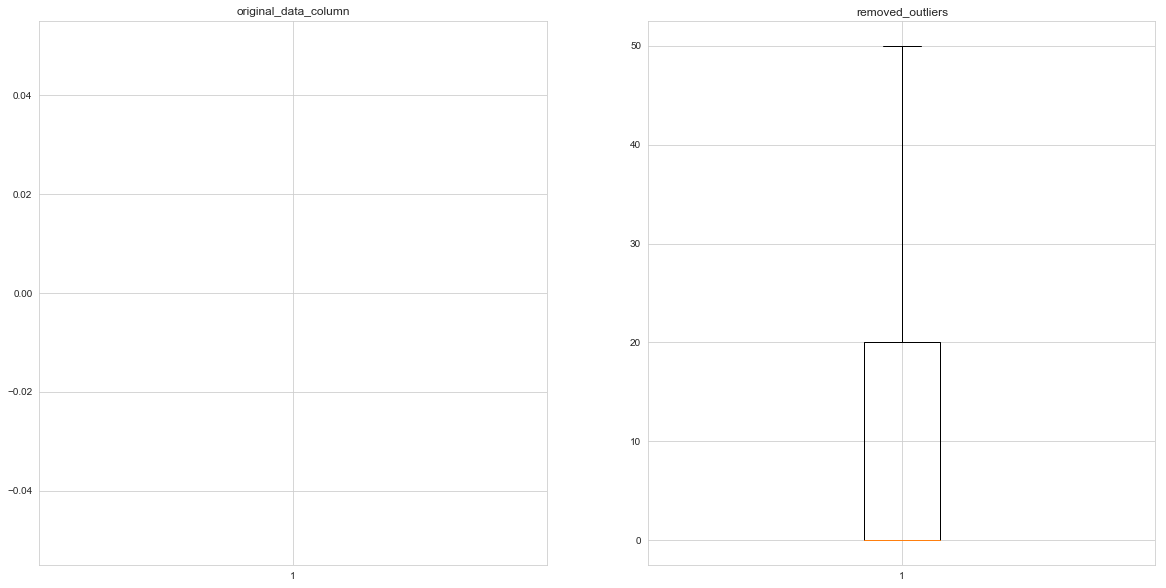

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 14.8
after removing outliers % of falses in data is 85.2


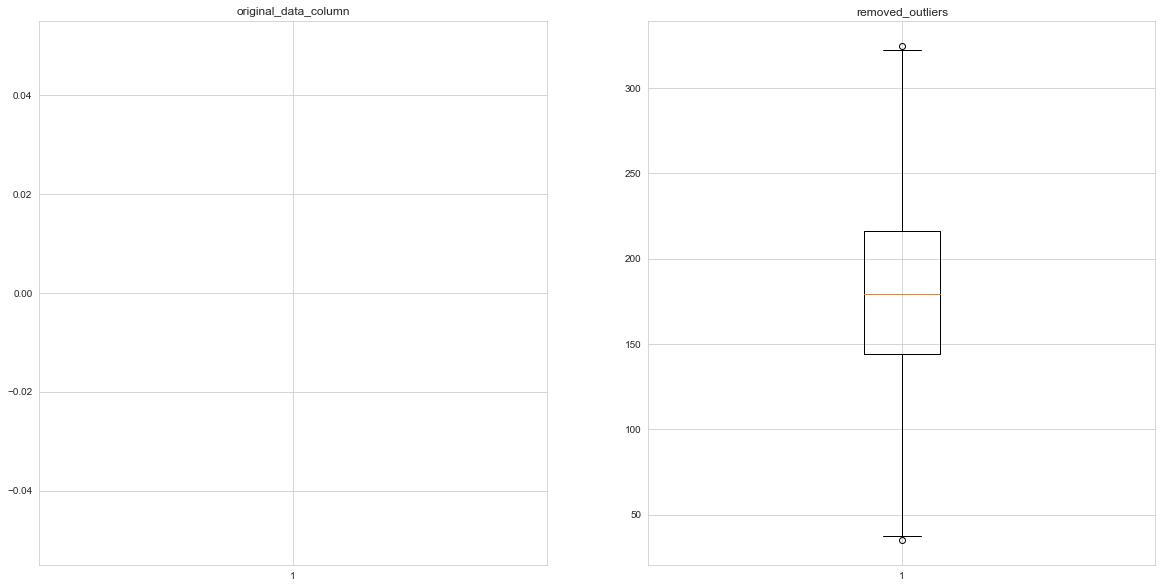

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.01
after removing outliers % of falses in data is 84.99


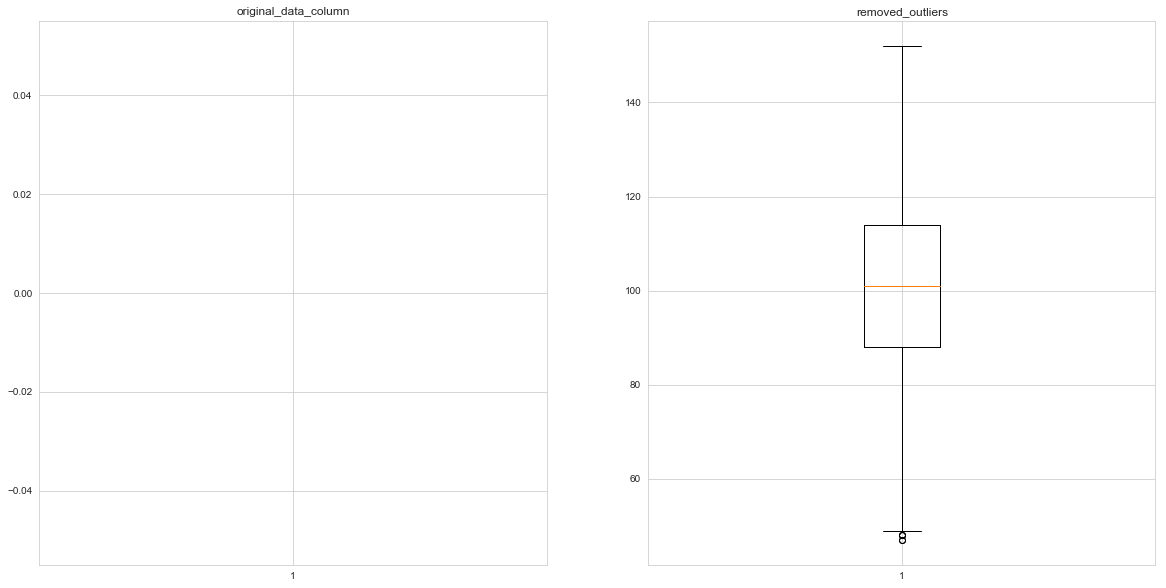

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.03
after removing outliers % of falses in data is 84.97


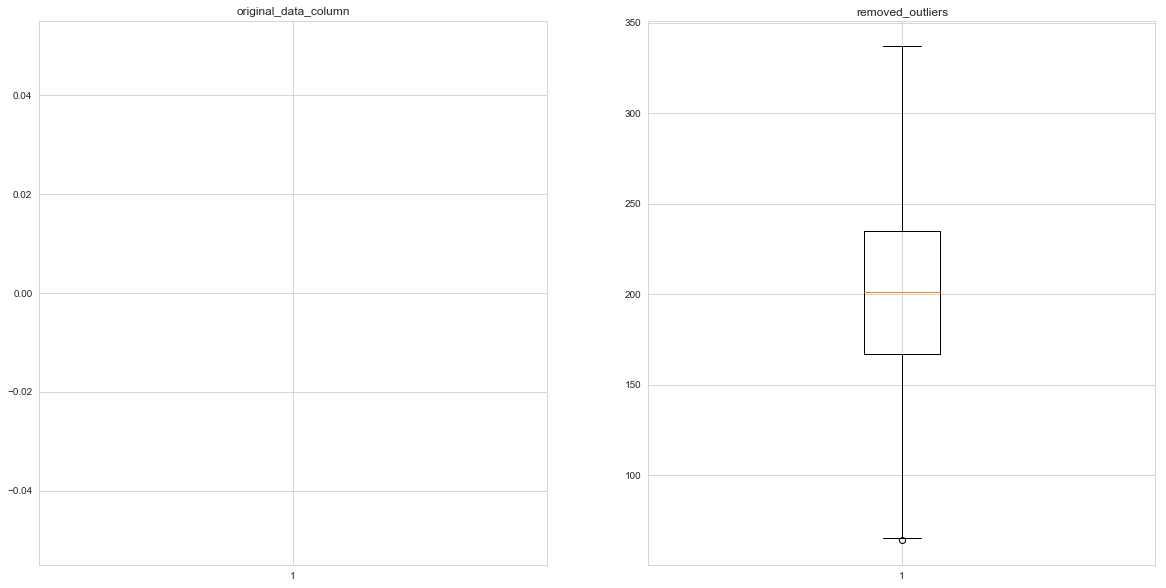

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.11
after removing outliers % of falses in data is 84.89


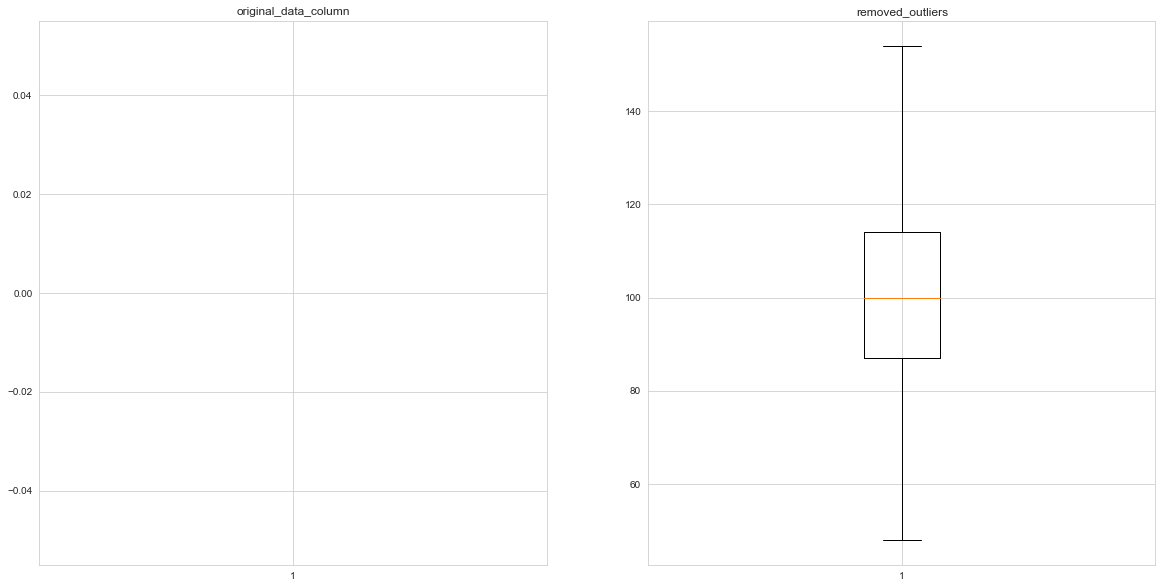

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.16
after removing outliers % of falses in data is 84.84


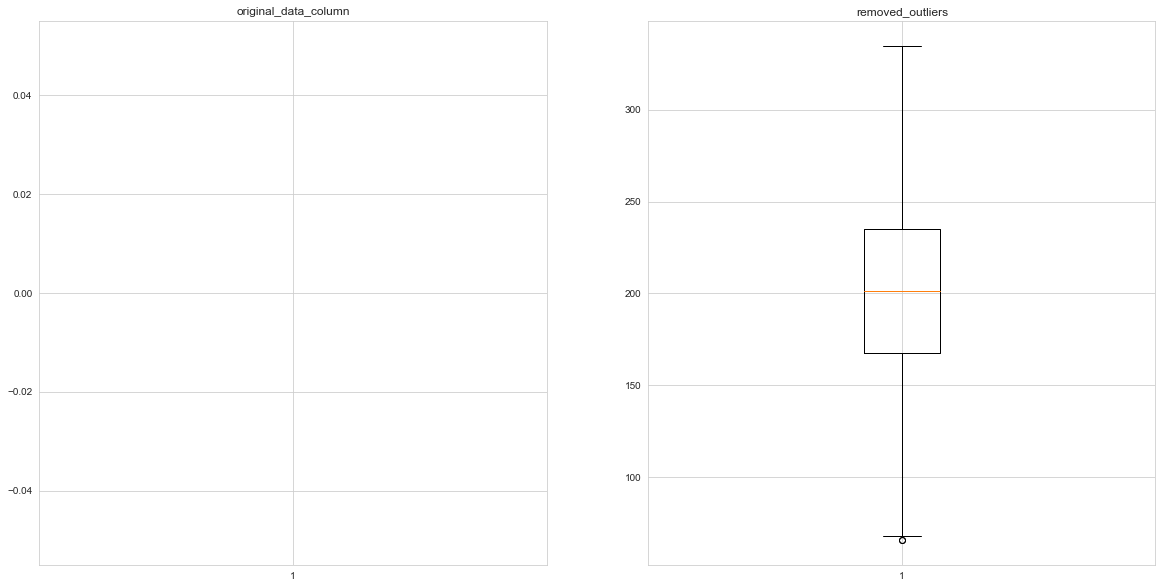

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 15.1
after removing outliers % of falses in data is 84.9


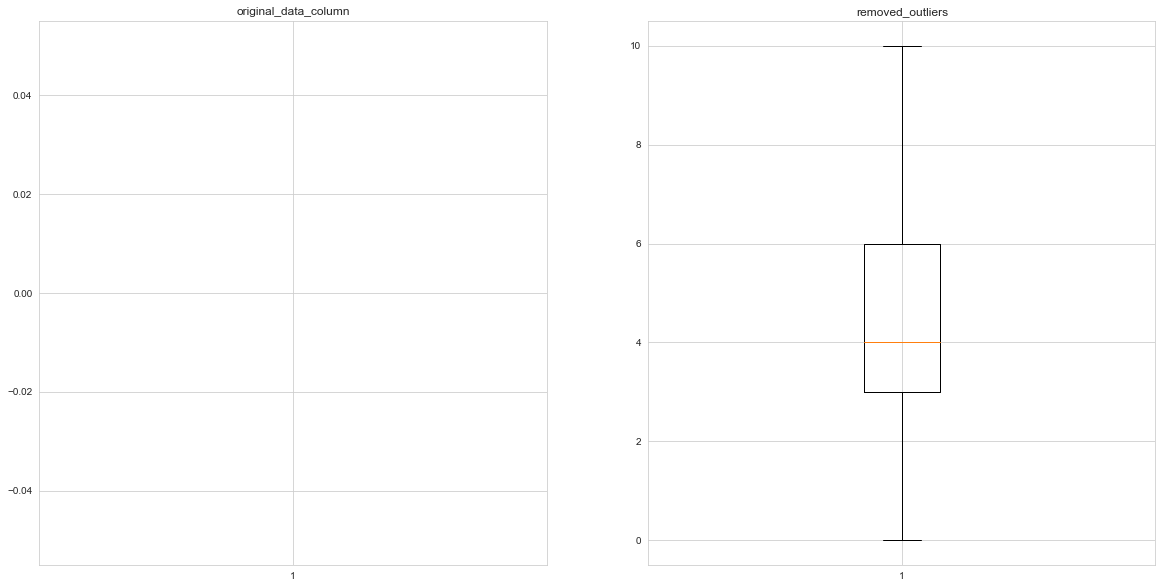

before removing outliers % of trues in data is 15.11
before removing outliers % of falses in data is 84.89
-------------------------------------------------------------------------------
after removing outliers % of trues in data is 11.76
after removing outliers % of falses in data is 88.24


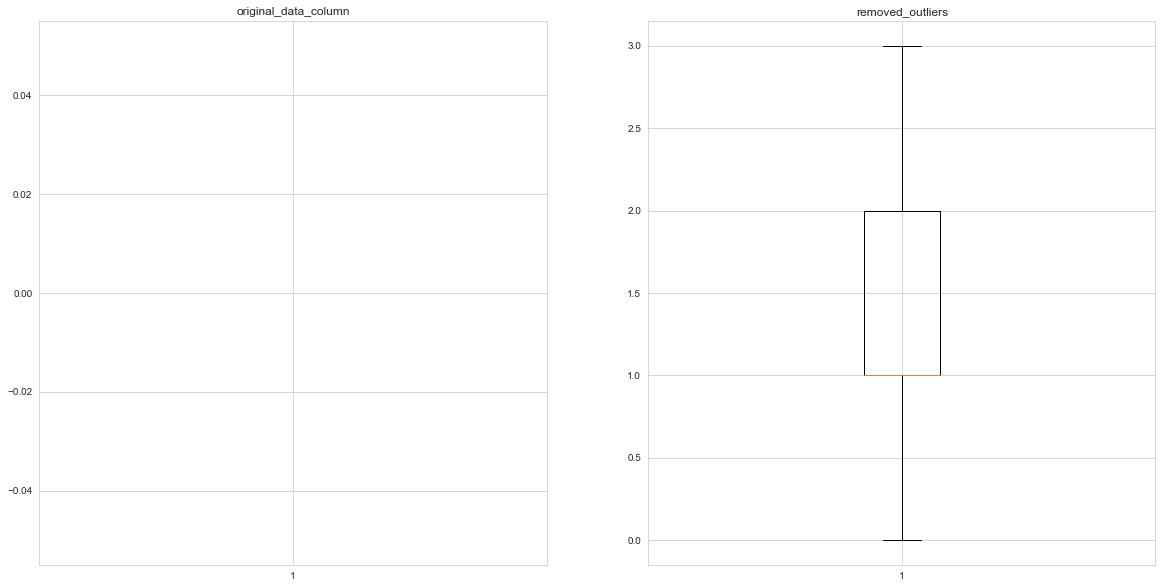

In [435]:

for item in outlier_col_list:
    outlier_treatment(new_df,item)

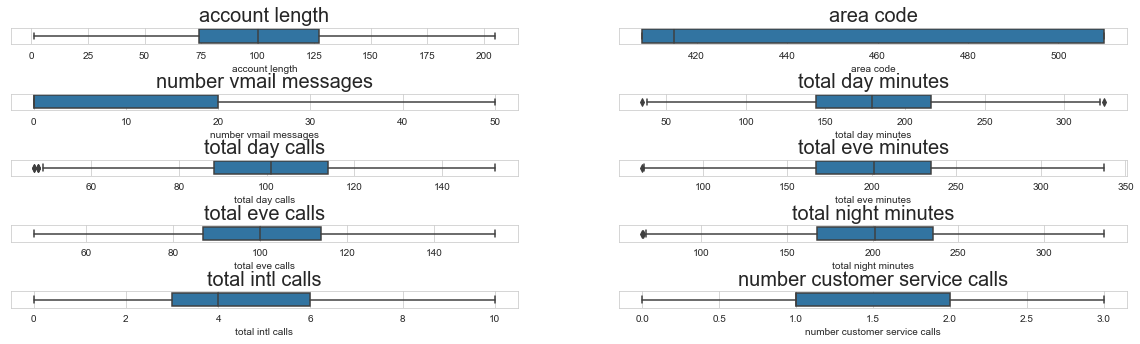

In [436]:
i = 0
plt.subplots_adjust(hspace = 3.0)
for item in new_df.columns:
    if new_df[item].dtypes != 'object':
        plt.subplot(9,2,i+1)
        sns.boxplot(df[item])
        plt.title(item,fontsize = 20)
        i+=1

In [437]:
#checking data balance
l = len(new_df[new_df['Churn Indicator'] == ' True.'])
r = len(new_df[new_df['Churn Indicator'] == ' False.'])
print('% of trues in data is {}'.format(round((l/len(df))*100,2)))
print('% of falses in data is {}'.format(round((r/len(df))*100,2)))

% of trues in data is 15.11
% of falses in data is 84.89


In [438]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3332
Data columns (total 14 columns):
state                            3330 non-null object
account length                   3312 non-null float64
area code                        3330 non-null int64
international plan               3330 non-null object
voice mail plan                  3330 non-null object
number vmail messages            3329 non-null float64
total day minutes                3303 non-null float64
total day calls                  3305 non-null float64
total eve minutes                3306 non-null float64
total eve calls                  3309 non-null float64
total night minutes              3299 non-null float64
total intl calls                 3251 non-null float64
number customer service calls    3062 non-null float64
Churn Indicator                  3330 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 466.2+ KB


In [439]:
for item in new_df.columns:
    if new_df[item].dtypes != 'object':
        new_df.fillna(new_df[item].mean(),inplace = True)

In [440]:
df = new_df

In [441]:
s = df.dtypes == 'object'
object_cols = s[s].index
print(object_cols)

Index(['state', 'international plan', 'voice mail plan', 'Churn Indicator'], dtype='object')


In [442]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for cols in object_cols:
    df[cols] = encoder.fit_transform(df[cols])
df = df.astype(float)

In [443]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = df['Churn Indicator']
df.drop('Churn Indicator',axis =1, inplace =True)
columns_to_be_keep = (df.columns)
print(df.columns)
ros = RandomOverSampler(ratio = 1)
df = scaler.fit_transform(df)
new_X_train,new_y = ros.fit_sample(df,y)

X_train,X_val,y_train,y_val = train_test_split(new_X_train,new_y,test_size = 0.3,random_state = 42)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total intl calls',
       'number customer service calls'],
      dtype='object')


C:\Users\yasht\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [444]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

n = 100
n_list_train = []
n_list_val = []
range = [100,200,300,400,500,600,700,800,900,1000]
for i in [100,200,300,400,500,600,700,800,900,1000]:
    model = RandomForestClassifier(n_estimators = i)
    model.fit(X_train,y_train)
    pred = model.predict(X_val)
    val_score = accuracy_score(y_val,pred)
    n_list_val.append(val_score)
    pred_x = model.predict(X_train)
    train_score = accuracy_score(y_train,pred_x)
    n_list_train.append(train_score)



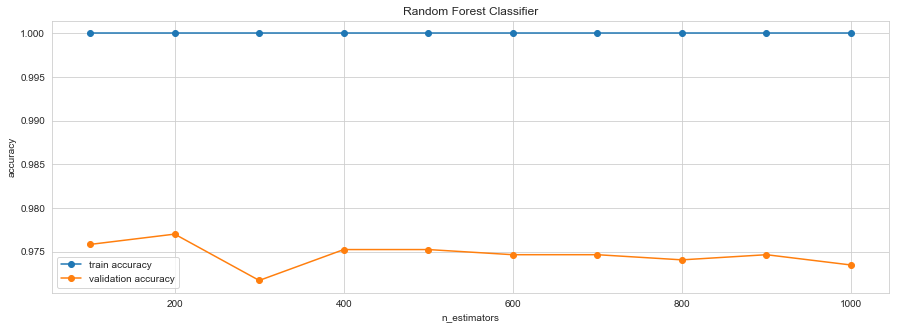

In [445]:
plt.figure(figsize = (15,5))
plt.plot([100,200,300,400,500,600,700,800,900,1000],n_list_train,label = 'train accuracy',marker = 'o')
plt.plot([100,200,300,400,500,600,700,800,900,1000],n_list_val,label = 'validation accuracy',marker = 'o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.title('Random Forest Classifier')
plt.show()

In [446]:
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train,y_train)
pred = model.predict(X_val)
print(confusion_matrix(y_val,pred))

[[843  41]
 [  3 810]]


In [447]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [448]:
def fit_model(model,X_train, y_train, X_val, y_val, cross_val=False, cv_folds=5):
    
    model.fit(X_train,y_train)
    #Predict values:
    training_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_val)
    model_report(X_train,y_train, X_val,y_val, training_predictions, validation_predictions)

    if cross_val:
        evaluate_cross_validation(model, X_train, y_train, cv_folds)
        
def model_report(X_train,y_train, X_val,y_val, training_predictions, validation_predictions):
    #Print model report:
    print("\nModel Report")
    print("Training")
    print("accuracy score : {}".format(accuracy_score(y_train, training_predictions)))
    #print("Root Mean Squared Error : {}".format(np.sqrt(mean_squared_error(y_train, training_predictions))))
    #print("R2 Score: {}".format(r2_score(y_train, training_predictions)))
    print("\n")
    print("Validation")
    print("accuracy score  : {}".format(accuracy_score(y_val, validation_predictions)))
    #print("Root Mean Squared Error : {}".format(np.sqrt(mean_squared_error(y_val, validation_predictions))))
    #print("R2 Score: {}".format(r2_score(y_val, validation_predictions)))
    
def evaluate_cross_validation(model, X_train, y_train, K):
    
    cv = KFold(n_splits=K, shuffle=True, random_state=2)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring = 'accuracy')
    print()
    print(scores)
    print("Mean score: {} max is {} and min {}".format(scores.mean(), max(scores), min(scores)))   
    
def random_search(model, param_grid, X_train, y_train, X_val, y_val, cv):
    
    random_search = RandomizedSearchCV(model, param_grid, scoring="accuracy", n_jobs=2, cv=cv)
    random_result = random_search.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    means = random_result.cv_results_['mean_test_score']
    stds = random_result.cv_results_['std_test_score']
    params = random_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    validation_predictions = random_result.predict(X_val)

    print("Validation")
    print("accuracy score : {}".format(accuracy_score(y_val, validation_predictions)))
    #print("Root Mean Squared Error : {}".format(np.sqrt(mean_squared_error(y_val, validation_predictions))))
    #print("R2 Score: {}".format(r2_score(y_val, validation_predictions)))

In [449]:
model = RandomForestClassifier(n_estimators = 400)
fit_model(model,X_train,y_train,X_val,y_val,cross_val=True)


Model Report
Training
accuracy score : 1.0


Validation
accuracy score  : 0.9746611667648792

[0.95454545 0.96464646 0.95954488 0.96586599 0.9608091 ]
Mean score: 0.9610823787814938 max is 0.965865992414665 and min 0.9545454545454546


In [450]:
df_test = pd.read_csv('Churn Test Dataset.csv')
#columns_to_be_keep.append('Churn Indicator')
df_test = df_test[columns_for_test]

In [451]:
s = df_test.dtypes == 'object'
object_cols = s[s].index
for col in object_cols:
    df_test[col] = encoder.fit_transform(df_test[col])
y_test = df_test['Churn Indicator']
df_test.drop('Churn Indicator',axis = 1,inplace = True)
df_test.astype(float)
df_test = scaler.fit_transform(df_test)

pred = model.predict(df_test)
score = accuracy_score(y_test.astype(float),pred)
print(score)
print(confusion_matrix(y_test, pred))

0.909688995215311
[[1355   77]
 [  74  166]]


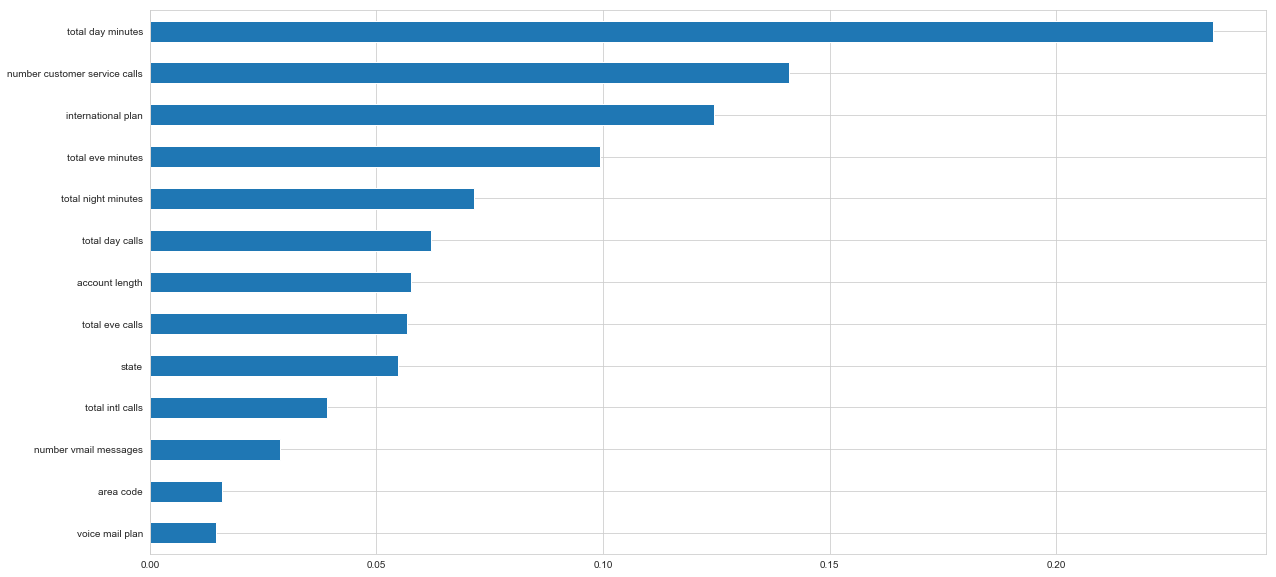

In [452]:
columns = columns_to_be_keep

importances = model.feature_importances_
weights = pd.Series(importances,
                 index=columns)
weights.sort_values()[:].plot(kind = 'barh')

In [453]:
#decsion tree

#model=DecisionTreeClassifier(random_state=n)
n_list_train = []
n_list_val = []

for i in [5,10,15,20,25]:
    tree_model=DecisionTreeClassifier(random_state=i)
    tree_model.fit(X_train,y_train)
    pred = tree_model.predict(X_val)
    val_score = accuracy_score(y_val,pred)
    n_list_val.append(val_score)
    pred_x = tree_model.predict(X_train)
    train_score = accuracy_score(y_train,pred_x)
    n_list_train.append(train_score)


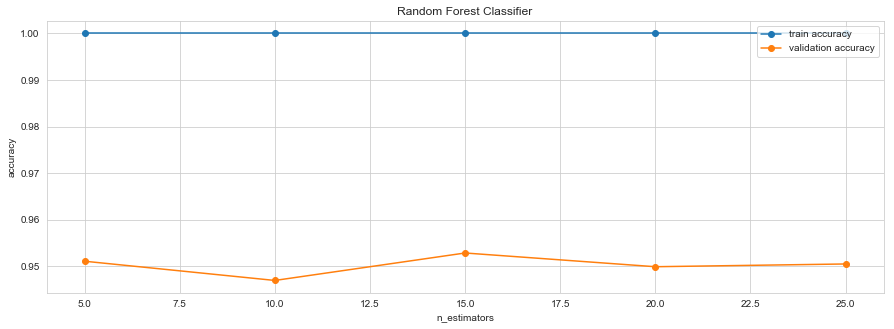

In [454]:
plt.figure(figsize = (15,5))
plt.plot([5,10,15,20,25],n_list_train,label = 'train accuracy',marker = 'o')
plt.plot([5,10,15,20,25],n_list_val,label = 'validation accuracy',marker = 'o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.title('Random Forest Classifier')
plt.show()

In [455]:
tree_model=DecisionTreeClassifier(random_state=20)
fit_model(tree_model,X_train,y_train,X_val,y_val,cross_val=True)


Model Report
Training
accuracy score : 1.0


Validation
accuracy score  : 0.9499116087212728

[0.94191919 0.93560606 0.94437421 0.94058154 0.94058154]
Mean score: 0.9406125094178192 max is 0.9443742098609356 and min 0.9356060606060606


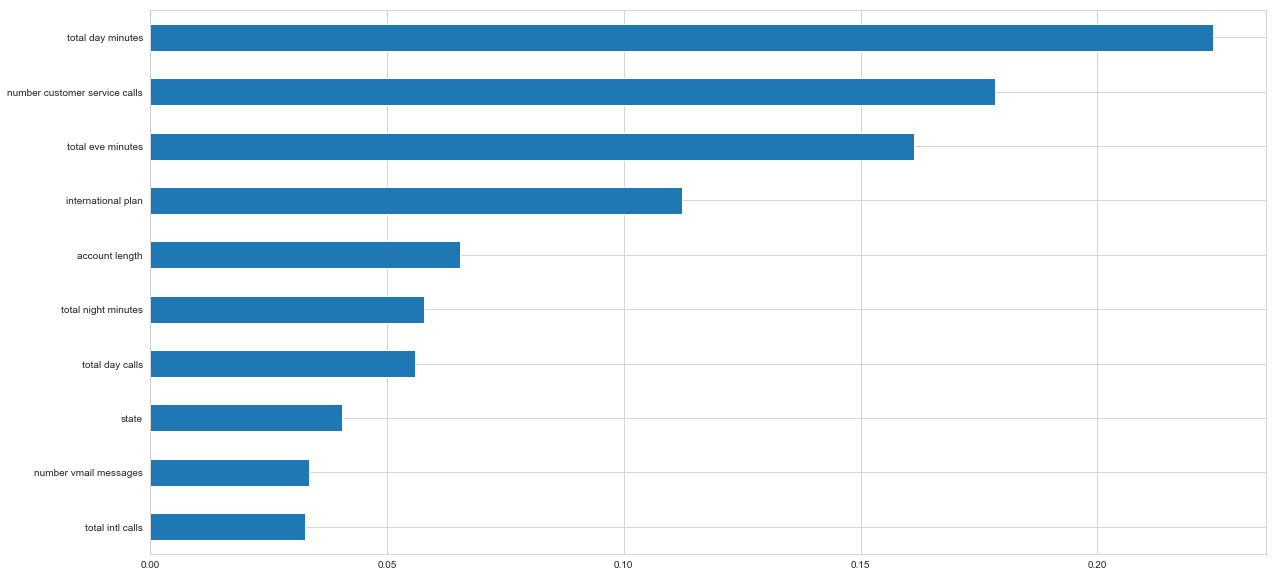

In [456]:
columns = columns_to_be_keep
importances = tree_model.feature_importances_
weights = pd.Series(importances,
                 index=columns)
weights.sort_values()[-10:].plot(kind = 'barh')

In [457]:
'''max_depth = [5, 10, 15, 20]
max_features = ['log2', 'sqrt', 'auto']
min_samples_leaf = [10, 50, 70, 100]
param_grid = dict(max_depth=max_depth, max_features=max_features, 
                  min_samples_leaf=min_samples_leaf)
kfold = KFold(n_splits=5, shuffle=True, random_state=2)

random_search(DecisionTreeRegressor(random_state=15), param_grid, X_train, y_train, X_val, y_val, kfold)'''

"max_depth = [5, 10, 15, 20]\nmax_features = ['log2', 'sqrt', 'auto']\nmin_samples_leaf = [10, 50, 70, 100]\nparam_grid = dict(max_depth=max_depth, max_features=max_features, \n                  min_samples_leaf=min_samples_leaf)\nkfold = KFold(n_splits=5, shuffle=True, random_state=2)\n\nrandom_search(DecisionTreeRegressor(random_state=15), param_grid, X_train, y_train, X_val, y_val, kfold)"

In [458]:
from sklearn.linear_model import LogisticRegression


In [459]:
#decsion tree

#model=DecisionTreeClassifier(random_state=n)
n_list_train = []
n_list_val = []

for i in [0.0001,0.001,0.01]:
    log_model=LogisticRegression(C = i)
    log_model.fit(X_train,y_train)
    pred = log_model.predict(X_val)
    val_score = accuracy_score(y_val,pred)
    n_list_val.append(val_score)
    pred_x = log_model.predict(X_train)
    train_score = accuracy_score(y_train,pred_x)
    n_list_train.append(train_score)

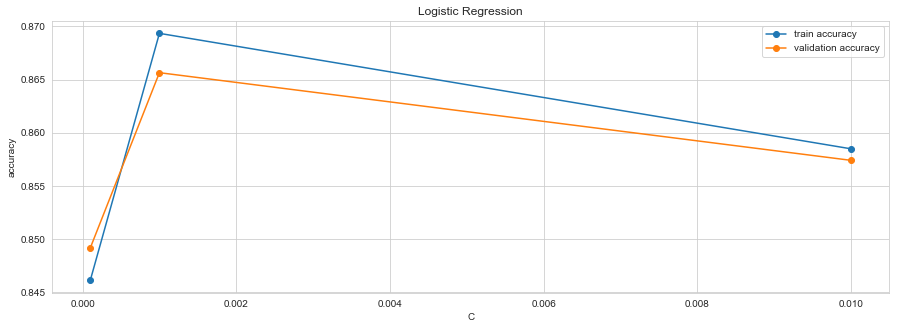

In [460]:
plt.figure(figsize = (15,5))
plt.plot([0.0001,0.001,0.01],n_list_train,label = 'train accuracy',marker = 'o')
plt.plot([0.0001,0.001,0.01],n_list_val,label = 'validation accuracy',marker = 'o')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.title('Logistic Regression')
plt.show()

In [461]:
model_log = LogisticRegression(C = 0.001)
model_log.fit(X_train,y_train)
pred_train = model_log.predict(X_train)
pred_val = model_log.predict(X_val)
val_score = accuracy_score(y_val,pred_val)
train_score = accuracy_score(y_train,pred_train)
print('train score is {}'.format(train_score))
print('validation score is {}'.format(val_score))
print('confusion matrix is \n {}'.format(confusion_matrix(y_val,pred_val)))

train score is 0.8693454637351529
validation score is 0.8656452563347083
confusion matrix is 
 [[771 113]
 [115 698]]


In [462]:
df_test = pd.read_csv('Churn Test Dataset.csv')
df_test = df_test[columns_for_test]
df_test.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total intl calls,number customer service calls,Churn Indicator
0,HI,101,510,no,no,0,70.9,123,211.9,73,236.0,3,3,False.
1,MT,137,510,no,no,0,223.6,86,244.8,139,94.2,7,0,False.
2,OH,103,408,yes,yes,29,294.7,95,237.3,105,300.3,6,1,False.
3,NM,99,415,no,no,0,216.8,123,126.4,88,220.6,2,1,False.
4,SC,108,415,no,no,0,197.4,78,124.0,101,204.5,4,2,False.


In [463]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [464]:
s = df_test.dtypes == 'object'
object_cols = s[s].index
for col in object_cols:
    df_test[col] = encoder.fit_transform(df_test[col])
y_test = df_test['Churn Indicator']
df_test.drop('Churn Indicator',axis = 1,inplace = True)
df_test.astype(float)
df_test = scaler.fit_transform(df_test)

In [465]:
pred = model.predict(df_test)
score = accuracy_score(y_test.astype(float),pred)
print(score)
print(confusion_matrix(y_test, pred))

0.909688995215311
[[1355   77]
 [  74  166]]


In [466]:
pred = tree_model.predict(df_test)
score = accuracy_score(y_test.astype(float),pred)
print(score)
print(confusion_matrix(y_test, pred))

0.8755980861244019
[[1307  125]
 [  83  157]]


In [467]:

pred = model_log.predict(df_test)
score = accuracy_score(y_test.astype(float),pred)
print(score)
print(confusion_matrix(y_test, pred))

0.7703349282296651
[[1105  327]
 [  57  183]]


> best model Random forest with validation accuracy-approx. 96% better choice for a balanced accuracy 
> if target is to only decrease FNR than Logistic regression will be better option 